In [46]:
import pandas as pd

df=pd.read_csv("/home/raoxy/data/Car_Hacking_5%.csv")
df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1201,41,39,39,35,0,0,0,154,R
1,809,64,187,127,20,17,32,0,20,R
2,1349,216,0,0,136,0,0,0,0,R
3,1201,41,39,39,35,0,0,0,154,R
4,2,0,0,0,0,0,3,2,228,R
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,R
818436,1088,255,0,0,0,255,134,9,0,R
818437,848,5,32,100,104,117,0,0,92,R
818438,1349,216,90,0,137,0,0,0,0,R


In [47]:
from sklearn.preprocessing import PowerTransformer

numeric_features=['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']
scaler = PowerTransformer(method='yeo-johnson')
df[numeric_features]=scaler.fit_transform(df[numeric_features])
df[numeric_features].describe()

,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05
mean,1.751923e-13,7.174346e-15,-4.785854e-13,3.773322e-13,3.063667e-13,-2.187703e-13,4.576280e-14,1.293264e-13
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.178105e+00,-1.185595e+00,-8.965118e-01,-1.077069e+00,-1.091400e+00,-1.179818e+00,-8.222196e-01,-9.299709e-01
25%,-1.178105e+00,-1.185595e+00,-8.965118e-01,-1.077069e+00,-1.091400e+00,-1.179818e+00,-8.222196e-01,-9.299709e-01
50%,-1.473324e-02,3.817893e-01,-8.965118e-01,2.308893e-01,2.651124e-01,3.601800e-01,-8.222196e-01,-9.299709e-01
75%,9.159685e-01,8.225598e-01,1.200767e+00,1.003029e+00,1.091088e+00,1.038137e+00,9.536350e-01,1.151285e+00
max,1.436664e+00,1.691630e+00,1.450953e+00,1.250547e+00,1.461472e+00,1.404056e+00,1.645167e+00,1.383268e+00


In [48]:
# X= df[numeric_features]
# y= df['Label']

# from imblearn.under_sampling import NearMiss
# nm_1 = NearMiss() #形参默认 version=1, 即采用 NearMiss-1
# X_resampled, y_resampled = nm_1.fit_resample(X, y)
# df=pd.merge(X_resampled,y_resampled,left_index=True,right_index=True)
# print(df.Label.value_counts())

In [49]:
def shuffle_dataframe(df):
    # 打乱DataFrame的行
    shuffled_df = df.sample(frac=1).reset_index(drop=True)
    return shuffled_df

In [50]:
df=shuffle_dataframe(df).iloc[:, 1:]

In [51]:
# 定义替换规则，将字符串映射为数字
replacement_dict = {
    'R': 0,
    'RPM': 1,
    'gear': 2,
    'DoS': 3,
    'Fuzzy': 4
}

# 使用 .replace() 方法替换最后一列的值
df['Label'] = df['Label'].replace(replacement_dict)
df

,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,0.884702,1.452392,1.275079,0.230889,0.291328,0.360180,-0.822220,0.591943,0
1,-0.215687,0.207743,0.993884,0.029798,0.422605,0.330068,-0.822220,1.159180,0
2,0.162470,1.482307,1.277183,0.230889,0.291328,0.360180,-0.822220,0.591943,0
3,1.185831,1.448573,1.277183,0.230889,0.291328,0.360180,-0.822220,0.591943,0
4,-1.178105,1.214054,-0.896512,-1.077069,0.630002,1.038137,0.812834,1.320085,0
...,...,...,...,...,...,...,...,...,...
818435,0.483892,0.414745,0.881295,0.581767,-0.029591,1.095739,1.550461,0.553030,0
818436,-1.178105,-1.185595,-0.896512,-1.077069,-1.091400,-0.896735,1.019802,1.342776,0
818437,-0.215687,0.398478,1.317315,-0.080984,0.580061,0.360180,-0.822220,1.156575,0
818438,0.884702,-1.185595,1.291385,0.379275,1.236042,-0.726266,1.613393,-0.929971,0


In [52]:
import pandas as pd
from math import ceil

overlap=2
num_splits=100
split_size = ceil(len(df) / num_splits)
split_dfs = []
split_size

8185

In [53]:
for i in range(num_splits):
    start_idx = i * split_size
    end_idx = start_idx + split_size

    if i > 0:
        start_idx = max(0, start_idx - overlap)
    end_idx = min(len(df), end_idx)

    split_dfs.append(df.iloc[start_idx:end_idx])
    split_dfs[i].to_csv(f'pre_car_{i+1}.csv', index=False)

In [55]:
tf=pd.read_csv("split_5_15.csv")
tf

,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,-1.178105,0.777182,1.200767,1.250547,1.161357,1.293030,0.867279,-0.929971,0
1,0.915968,0.518475,0.900406,1.250547,0.674799,0.415542,-0.822220,1.383268,1
2,0.884702,1.482307,1.277183,0.230889,0.291328,0.360180,-0.822220,0.591943,0
3,0.483892,0.398478,0.871243,0.581767,-0.029591,1.095739,1.544132,0.658227,0
4,-1.178105,-1.185595,-0.896512,0.975840,-1.091400,0.931108,1.624538,0.573053,0
...,...,...,...,...,...,...,...,...,...
8182,-0.215687,0.381789,0.062000,0.892637,1.133185,-1.179818,-0.822220,0.984749,0
8183,1.372989,-1.185595,-0.896512,1.008826,-1.091400,-1.179818,-0.822220,-0.929971,0
8184,-0.215687,0.381789,1.440630,0.892637,1.136812,-1.179818,-0.822220,1.327903,0
8185,1.380063,1.448573,1.277183,0.230889,0.291328,0.360180,-0.822220,0.591943,0


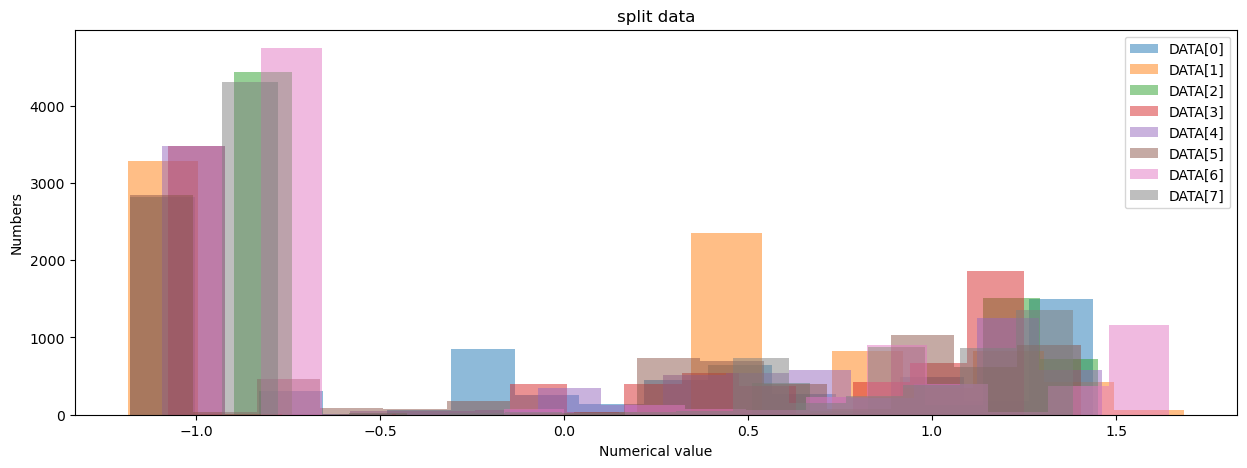

In [56]:
def showPicture(df,name_):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,5))
    for i in range(8):
        plt.hist(df[numeric_features].iloc[:,i], bins=15,alpha = 0.5,label=str(df.columns.tolist()[i]))
    plt.xlabel("Numerical value")
    plt.ylabel("Numbers")
    plt.tick_params(top=False, right=False)
    plt.title(name_)
    plt.legend()
    plt.show()

showPicture(tf,'split data')

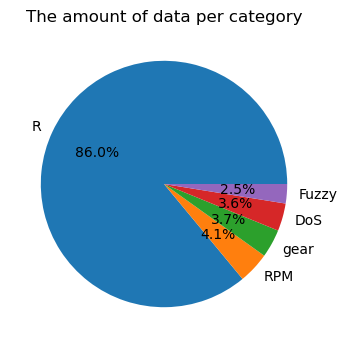

In [57]:
def printPieChart(df,sumData):
    import matplotlib.pyplot as plt                #导入绘图包
    a=df.Label.value_counts()/sumData*100
    a.to_numpy()
    plt.figure(figsize=(4,4))
    plt.pie(a,labels=['R','RPM','gear','DoS','Fuzzy'], autopct='%3.1f%%')  #以时间为标签，总计成交笔数为数据绘制饼图，并显示3位整数一位小数
    plt.title('The amount of data per category')             #加标题
    plt.show()
    
printPieChart(tf,137247)